In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

import mylibrary.nnlib as tnn
import copy

In [48]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

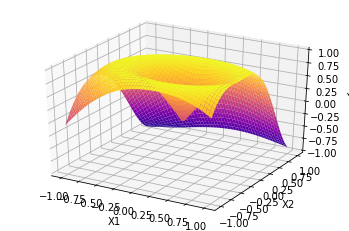

In [49]:
####Scaling the data to range -1,1
X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1

x1 = X1.reshape(-1)
x2 = X2.reshape(-1)

xx = np.c_[x1, x2]
yy = Y.reshape(-1,1)

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

## Training Neural Network

In [50]:
optimizer = tnn.Adam()
net = tnn.AutoForm(new_layers=True)
layer1 = tnn.NonLinearLayer(2, 5, activation=tnn.Relu(), optimizer=optimizer)
layer2 = tnn.NonLinearLayer(5, 5, activation=tnn.Relu(), optimizer=optimizer)
layer3 = tnn.LinearLayer(5, 1, optimizer = optimizer)

In [51]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):

    yout = net.forward(xx)
    dy = yout - yy
    dx = net.backward(dy)
    net.update()
    
    if epoch%100 == 0:
        
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  0.631710299264647


100 Error =  0.0239647381668419


200 Error =  0.019916646565947202


300 Error =  0.016264619978051377


400 Error =  0.01464484412364433


500 Error =  0.014152545635236545


600 Error =  0.013777545223275445


700 Error =  0.010889880082862898


800 Error =  0.006007362206162154


900 Error =  0.003565119063520305


1000 Error =  0.002876163131624519


1100 Error =  0.002795415288453716


1200 Error =  0.0026592441525574097


1300 Error =  0.0025861852056596325


1400 Error =  0.002473154203830872


1500 Error =  0.0023987265640725377


1600 Error =  0.0023628535944461497


1700 Error =  0.002338098348448229


1800 Error =  0.0023278514413865243


1900 Error =  0.002324685484787873


2000 Error =  0.002335190206242182


2100 Error =  0.0023017820596185254


2200 Error =  0.002245725797836202


2300 Error =  0.002063232689010201


2400 Error =  0.0020202489993203982


2500 Error =  0.0020023371449401843


2600 Error =  0.002051356419618776


2700 Error 

TclError: invalid command name "pyimage78"

0.0019319050986365636


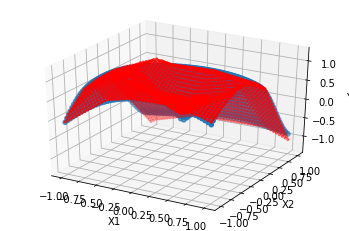

In [52]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('X1');ax.set_ylabel('X2');ax.set_zlabel('Y')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
print(error)

# Sorting the neurons

In [165]:
n_neurons = [2,5,5,1]
space_D = 1
layers = [layer1, layer2, layer3]

In [166]:
positions = []
for i, neurons in enumerate(n_neurons):
    pos = np.random.uniform(size=(neurons, space_D))
    positions.append(pos)
positions[0][positions[0].argmax()] = 1.
positions[0][positions[0].argmin()] = 0.

positions

[array([[1.],
        [0.]]), array([[0.76550736],
        [0.66278528],
        [0.93999242],
        [0.70688912],
        [0.87565228]]), array([[0.94638449],
        [0.09855894],
        [0.04974473],
        [0.1597438 ],
        [0.68278215]]), array([[0.04272919]])]

In [167]:
### ALGORITHM ###
## Until convergence
'''
1. Normalize the input layer position to range [0,1]
    - Normalize other layer position by the same factor
2. Move the neurons iteratively to previous layers and next layers position.

'''
pass

In [168]:
mini, maxi = positions[0].min(), positions[0].max()
divisor = maxi-mini

for i in range(len(positions)):
    positions[i] = (positions[i]-mini)/divisor
positions

[array([[1.],
        [0.]]), array([[0.76550736],
        [0.66278528],
        [0.93999242],
        [0.70688912],
        [0.87565228]]), array([[0.94638449],
        [0.09855894],
        [0.04974473],
        [0.1597438 ],
        [0.68278215]]), array([[0.04272919]])]

In [169]:
wts = layer1.weights**2
wts

array([[0.00316577, 0.73405705, 0.29263386, 0.18277333, 2.78650185],
       [1.7469563 , 0.09619573, 1.41216725, 2.30532015, 2.07762667]])

In [170]:
scaler0 = wts.sum(axis=1, keepdims=True)
scaler1 = wts.sum(axis=0, keepdims=True)
scaler0, scaler1

(array([[3.99913186],
        [7.6382661 ]]),
 array([[1.75012207, 0.83025277, 1.70480111, 2.48809347, 4.86412852]]))

In [171]:
wts/scaler1

array([[0.00180889, 0.88413682, 0.17165279, 0.07345919, 0.57286764],
       [0.99819111, 0.11586318, 0.82834721, 0.92654081, 0.42713236]])

In [172]:
positions[1]

array([[0.76550736],
       [0.66278528],
       [0.93999242],
       [0.70688912],
       [0.87565228]])

In [173]:
positions[0]*wts/scaler1 ##wishful position for the 

array([[0.00180889, 0.88413682, 0.17165279, 0.07345919, 0.57286764],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [174]:
del_pos1 = (positions[0]*wts/scaler1).T
del_pos1, del_pos1.sum(axis=1, keepdims=True)

(array([[0.00180889, 0.        ],
        [0.88413682, 0.        ],
        [0.17165279, 0.        ],
        [0.07345919, 0.        ],
        [0.57286764, 0.        ]]), array([[0.00180889],
        [0.88413682],
        [0.17165279],
        [0.07345919],
        [0.57286764]]))

In [175]:
wts/scaler0 ## 

array([[0.00079161, 0.1835541 , 0.07317435, 0.04570325, 0.69677669],
       [0.22871111, 0.01259392, 0.1848806 , 0.30181197, 0.27200239]])

In [176]:
positions[1].T

array([[0.76550736, 0.66278528, 0.93999242, 0.70688912, 0.87565228]])

In [177]:
del_pos0 = positions[1].T*wts/scaler0
del_pos0, del_pos0.mean(axis=1, keepdims=True)

(array([[6.05986731e-04, 1.21656956e-01, 6.87833311e-02, 3.23071306e-02,
         6.10134093e-01],
        [1.75080036e-01, 8.34706598e-03, 1.73786367e-01, 2.13347598e-01,
         2.38179516e-01]]), array([[0.1666975 ],
        [0.16174812]]))

In [178]:
### Method 1
## uses weight squared
## normalized the factor by max normalizing in for individual neurons

del_positions = [0]*len(positions)
for i, layer in enumerate(layers):
#     print(i, layer.weights.shape)
    wts = layer.weights**2
    scaler0 = wts.sum(axis=1, keepdims=True)
    scaler1 = wts.sum(axis=0, keepdims=True)
    
    del_pos0 = positions[i+1].T*wts/scaler0
    del_pos0 = del_pos0.sum(axis=1, keepdims=True)
    
    del_pos1 = (positions[i]*wts/scaler1).T
    del_pos1 = del_pos1.sum(axis=1, keepdims=True)
    
    del_positions[i] += del_pos0
    del_positions[i+1] += del_pos1

In [179]:
# del_positions[0] = positions[0]
del_positions[0] = 2*positions[0]
del_positions[-1] = 2*positions[-1]
for i in range(len(del_positions)):
    del_positions[i] = del_positions[i]/2.

In [180]:
# del_positions

In [181]:
## update positions
lr = 0.2
for i in range(len(positions)):
    positions[i] = lr*del_positions[i] + (1-lr)*positions[i]
positions

[array([[1.],
        [0.]]), array([[0.64123431],
        [0.66320155],
        [0.80922101],
        [0.59872308],
        [0.8203844 ]]), array([[0.84483663],
        [0.16531035],
        [0.11592152],
        [0.21508273],
        [0.63412899]]), array([[0.04272919]])]

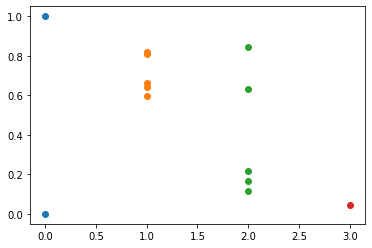

In [182]:
### Plotting the neurons
%matplotlib inline
for i, pos in enumerate(positions):
    plt.scatter([i]*len(pos), pos)

## Doing this iteratively

In [189]:
n_neurons = [2,5,5,1]
space_D = 1
layers = [layer1, layer2, layer3]

In [190]:
def initialize_positions(layers, n_neurons, space_D):
    positions = []
    for i, neurons in enumerate(n_neurons):
        pos = np.random.uniform(size=(neurons, space_D))
        positions.append(pos)
    return positions

In [191]:
def normalize_positions(positions):
    mini, maxi = positions[0].min(), positions[0].max()
    divisor = maxi-mini

    for i in range(len(positions)):
        positions[i] = (positions[i]-mini)/divisor
    return positions

# def normalize_positions(positions):
#     mini = 9e9
#     maxi = -9e9
#     for i in range(len(positions)):
#         mi, ma = positions[i].min(), positions[i].max()
#         if mi<mini:
#             mini=mi
#         if ma>maxi:
#             maxi=ma
    
#     divisor = maxi-mini
#     for i in range(len(positions)):
#         positions[i] = (positions[i]-mini)/divisor
#     return positions

In [192]:
def compute_del_positions(positions, layers):
    del_positions = [0]*len(positions)
    for i, layer in enumerate(layers):
        wts = layer.weights**2
        scaler0 = wts.sum(axis=1, keepdims=True)
        scaler1 = wts.sum(axis=0, keepdims=True)

        del_pos0 = positions[i+1].T*wts/scaler0
        del_pos0 = del_pos0.sum(axis=1, keepdims=True)

        del_pos1 = (positions[i]*wts/scaler1).T
        del_pos1 = del_pos1.sum(axis=1, keepdims=True)

        del_positions[i] += del_pos0
        del_positions[i+1] += del_pos1
        
#     del_positions[0] = positions[0]
#     del_positions[-1] = del_positions[-1]
    for i in range(1, len(del_positions)-1):
        del_positions[i] = del_positions[i]/2.    
    return del_positions

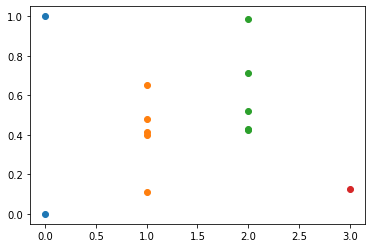

In [193]:
positions = initialize_positions(layers, n_neurons, space_D)
positions[0] = np.array([[0], [1]])
positions = normalize_positions(positions)
# for i, position in enumerate(positions):
#     print(i,position)

%matplotlib inline
for i, pos in enumerate(positions):
    plt.scatter([i]*len(pos), pos)

In [194]:
lr = 0.1

%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(111)

for epoch in range(1000):
    
    if epoch%1 == 0:
        ax.clear()
        for i, pos in enumerate(positions):
            ax.scatter([i]*len(pos), pos)
        fig.canvas.draw()
        plt.pause(0.01)
        
    positions = normalize_positions(positions)
    del_positions = compute_del_positions(positions, layers)
    for i in range(len(positions)):
        positions[i] = lr*del_positions[i] + (1-lr)*positions[i]

TclError: invalid command name "pyimage308"

In [ ]:
%matplotlib inline
for i, pos in enumerate(positions):
    plt.scatter([i]*len(pos), pos)